<a href="https://colab.research.google.com/github/aparna-2001/machine_learning_using_python/blob/main/level1_ML_foundation_BCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alphawaves data,

subject 0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat


- numpy for numerical computing
- pandas for data handling
- matplotlib for plotting and visualising
- seaborn for visualising
- scipy, loadmat for loading the .mat files


In [ ]:
#loading the .mat file in loadmat

data = loadmat('subject_00.mat')
print(data.keys())

print(type(data['SIGNAL']))

signal = data['SIGNAL']

if hasattr(signal, 'dtype') and signal.dtype.names:
    print(signal.dtype.names)


dict_keys(['__header__', '__version__', '__globals__', 'SIGNAL'])
<class 'numpy.ndarray'>


In [ ]:
#print(data['__header__'])
#print(data['__version__'])
#print(data['__globals__'])
print(data['SIGNAL'])

[[ 0.00000000e+00  2.31471094e+03 -2.47386426e+03 ... -3.27888818e+03
   0.00000000e+00  0.00000000e+00]
 [ 1.95312500e-03  2.31207739e+03 -2.47719287e+03 ... -3.27667456e+03
   0.00000000e+00  0.00000000e+00]
 [ 3.90625000e-03  2.30813916e+03 -2.47775000e+03 ... -3.26313354e+03
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.23244141e+02  1.92760596e+03 -2.45507520e+03 ... -3.27909985e+03
   0.00000000e+00  0.00000000e+00]
 [ 1.23246094e+02  1.93911743e+03 -2.44151099e+03 ... -3.25797363e+03
   0.00000000e+00  0.00000000e+00]
 [ 1.23248047e+02  1.94014917e+03 -2.43970483e+03 ... -3.24809204e+03
   0.00000000e+00  0.00000000e+00]]


In [ ]:
#extracting the signal only

signal_data = pd.DataFrame(data['SIGNAL'])


signal_data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000000,2314.710938,-2473.864258,304.726593,-6740.526367,-6507.790039,-11247.854492,-2859.524170,-14004.568359,-1706.199707,-4104.730469,-6290.920410,-12415.869141,-7290.736816,170.436508,397.110260,-3278.888184,0.0,0.0
1,0.001953,2312.077393,-2477.192871,295.271210,-6747.804199,-6508.391602,-11249.747070,-2863.340820,-14008.770508,-1708.395874,-4104.203613,-6288.968262,-12418.380859,-7293.556641,175.323837,400.196503,-3276.674561,0.0,0.0
2,0.003906,2308.139160,-2477.750000,292.862305,-6750.519043,-6510.719238,-11248.869141,-2867.504883,-14007.042969,-1709.802368,-4105.119141,-6274.008301,-12422.494141,-7294.418945,193.758057,410.232483,-3263.133545,0.0,0.0
3,0.005859,2303.175293,-2477.378174,296.507050,-6756.901856,-6515.480957,-11250.728516,-2872.019775,-14011.469727,-1709.260498,-4109.889648,-6266.696777,-12422.033203,-7302.818848,197.839844,410.054993,-3260.899902,0.0,0.0
4,0.007812,2307.331543,-2471.294434,301.831573,-6754.847656,-6509.622070,-11247.145508,-2865.405518,-14011.854492,-1702.394165,-4102.324707,-6257.812012,-12413.977539,-7298.030273,200.905090,415.010742,-3255.357422,0.0,0.0


In [ ]:
print(signal_data.shape)

(63104, 19)


In [ ]:
#signal_data.iloc[0:6, 0]

first_row = signal_data.iloc[0, 0]
second_row = signal_data.iloc[1, 0]
third_row = signal_data.iloc[2, 0]

print(second_row - first_row)
print(third_row - second_row)


0.001953125
0.001953125


In [ ]:
#sampling rate

sampling_rate = 1/(signal_data.iloc[1,0] - signal_data.iloc[0, 0])

print(sampling_rate)

512.0


In [ ]:
#recording time

recording_time = signal_data.iloc[-1,0] - signal_data.iloc[0,0]
print(recording_time)

123.24804688


In [ ]:
#confirming the sample rate

sampling_rate_conf = signal_data.shape[0]/recording_time
print(sampling_rate_conf)

512.0081136980691


since the difference is uniform, the first column will be the time

- file is in .mat format.

- The data is structured as rows contain observation at each time.  

- sample and columns contains the recordings of EEG electrodes.

- sampling rate - total number of samples/ total recording time in seconds; or 1/(time[1] - time[0]) , sampling rate of this data is 512 Hz

- How long is the recording ; The recording time is 123.24804688 seconds, approximately close to 2 minutes


In [ ]:
#shape of the data

print(signal_data.shape)

print(signal_data.columns,'\n')

print(signal_data.info())

(63104, 19)
RangeIndex(start=0, stop=19, step=1) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       63104 non-null  float64
 1   1       63104 non-null  float64
 2   2       63104 non-null  float64
 3   3       63104 non-null  float64
 4   4       63104 non-null  float64
 5   5       63104 non-null  float64
 6   6       63104 non-null  float64
 7   7       63104 non-null  float64
 8   8       63104 non-null  float64
 9   9       63104 non-null  float64
 10  10      63104 non-null  float64
 11  11      63104 non-null  float64
 12  12      63104 non-null  float64
 13  13      63104 non-null  float64
 14  14      63104 non-null  float64
 15  15      63104 non-null  float64
 16  16      63104 non-null  float64
 17  17      63104 non-null  float64
 18  18      63104 non-null  float64
dtypes: float64(19)
memory usage: 9.1 MB
None


Answer these questions by exploring:

  
*  The shape of the data is 63104 * 19
*  There are no missing values
*  Each data type is float


In [ ]:
#summary statistics

signal_data_stat = signal_data.iloc[:, 1:17].describe()
signal_data_stat

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000
mean,2289.039524,-2341.967507,486.993320,-6781.180625,-6290.831646,-11416.863099,-2595.009038,-13955.873626,-1795.112935,-3777.377751,-6001.114902,-12319.253217,-7259.949999,61.228166,440.071618,-3237.453961
std,141.354372,111.627399,94.237564,91.141335,100.112292,113.830209,130.498954,38.852913,74.720035,156.177567,161.860930,48.089418,34.012791,49.931331,47.053957,32.626487
min,1919.117920,-2557.157959,217.782211,-7108.479492,-6534.169434,-11849.524414,-2934.821289,-14278.633789,-2057.885986,-4158.770019,-6366.761231,-12492.496094,-7381.578613,-59.928364,303.357452,-3355.604248
25%,2181.048035,-2456.960937,430.085991,-6816.313232,-6374.752075,-11518.110351,-2712.221619,-13982.040039,-1844.913513,-3908.614929,-6145.006348,-12344.897461,-7282.695435,26.797468,401.499443,-3259.574646
50%,2275.398926,-2362.735352,510.669525,-6781.700684,-6266.024902,-11400.988769,-2555.023926,-13955.098633,-1780.144714,-3739.749512,-5971.622803,-12311.807129,-7263.285156,52.249720,438.953949,-3237.737305
75%,2422.695740,-2231.222046,560.539948,-6714.244019,-6208.651123,-11323.991700,-2486.022583,-13930.370361,-1737.875031,-3644.156067,-5855.889893,-12282.636963,-7240.133667,84.224888,475.364578,-3215.229431
max,2577.585205,-2104.002686,795.885376,-6612.576660,-6095.611328,-11208.399414,-2391.815186,-13821.010742,-1659.822144,-3515.339600,-5726.430176,-12200.150391,-7144.030273,241.197327,592.525391,-3124.399170


In [ ]:
signal_data_stat_transpose = signal_data_stat.transpose()
signal_data_stat_transpose


,count,mean,std,min,25%,50%,75%,max
1,63104.0,2289.039524,141.354372,1919.117920,2181.048035,2275.398926,2422.695740,2577.585205
2,63104.0,-2341.967507,111.627399,-2557.157959,-2456.960937,-2362.735352,-2231.222046,-2104.002686
3,63104.0,486.993320,94.237564,217.782211,430.085991,510.669525,560.539948,795.885376
4,63104.0,-6781.180625,91.141335,-7108.479492,-6816.313232,-6781.700684,-6714.244019,-6612.576660
5,63104.0,-6290.831646,100.112292,-6534.169434,-6374.752075,-6266.024902,-6208.651123,-6095.611328
6,63104.0,-11416.863099,113.830209,-11849.524414,-11518.110351,-11400.988769,-11323.991700,-11208.399414
7,63104.0,-2595.009038,130.498954,-2934.821289,-2712.221619,-2555.023926,-2486.022583,-2391.815186
8,63104.0,-13955.873626,38.852913,-14278.633789,-13982.040039,-13955.098633,-13930.370361,-13821.010742
9,63104.0,-1795.112935,74.720035,-2057.885986,-1844.913513,-1780.144714,-1737.875031,-1659.822144
10,63104.0,-3777.377751,156.177567,-4158.770019,-3908.614929,-3739.749512,-3644.156067,-3515.339600


In [ ]:
headers = ['FP1', 'FP2', 'FC5', 'FC6', 'FZ', 'T7', 'CZ', 'T8',
           'P7', 'P3', 'PZ', 'P4', 'P8', 'O1', 'Oz', 'O2']

# Create a dictionary to map old column names (integers 1-16) to new headers
column_mapping = {i + 1: header for i, header in enumerate(headers)}

#renaming the columns
signal_data_stat_set = signal_data_stat.rename(columns=column_mapping)

signal_data_stat_set

,FP1,FP2,FC5,FC6,FZ,T7,CZ,T8,P7,P3,PZ,P4,P8,O1,Oz,O2
count,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000
mean,2289.039524,-2341.967507,486.993320,-6781.180625,-6290.831646,-11416.863099,-2595.009038,-13955.873626,-1795.112935,-3777.377751,-6001.114902,-12319.253217,-7259.949999,61.228166,440.071618,-3237.453961
std,141.354372,111.627399,94.237564,91.141335,100.112292,113.830209,130.498954,38.852913,74.720035,156.177567,161.860930,48.089418,34.012791,49.931331,47.053957,32.626487
min,1919.117920,-2557.157959,217.782211,-7108.479492,-6534.169434,-11849.524414,-2934.821289,-14278.633789,-2057.885986,-4158.770019,-6366.761231,-12492.496094,-7381.578613,-59.928364,303.357452,-3355.604248
25%,2181.048035,-2456.960937,430.085991,-6816.313232,-6374.752075,-11518.110351,-2712.221619,-13982.040039,-1844.913513,-3908.614929,-6145.006348,-12344.897461,-7282.695435,26.797468,401.499443,-3259.574646
50%,2275.398926,-2362.735352,510.669525,-6781.700684,-6266.024902,-11400.988769,-2555.023926,-13955.098633,-1780.144714,-3739.749512,-5971.622803,-12311.807129,-7263.285156,52.249720,438.953949,-3237.737305
75%,2422.695740,-2231.222046,560.539948,-6714.244019,-6208.651123,-11323.991700,-2486.022583,-13930.370361,-1737.875031,-3644.156067,-5855.889893,-12282.636963,-7240.133667,84.224888,475.364578,-3215.229431
max,2577.585205,-2104.002686,795.885376,-6612.576660,-6095.611328,-11208.399414,-2391.815186,-13821.010742,-1659.822144,-3515.339600,-5726.430176,-12200.150391,-7144.030273,241.197327,592.525391,-3124.399170




## **EEG Channel Summary Statistics (Columns 1-16 Only)**

| Channel | Electrode | Mean | Std | Min | Max | Range | Baseline Status | Signal Quality |
|---------|-----------|----------|---------|-------------|-------------|---------|-----------------|----------------|
| 1 | **FP1** | 2289.04 | 141.35 | 1919.12 | 2577.59 | 658.47 | Moderate Drift | High Variability |
| 2 | **FP2** | -2341.97 | 111.63 | -2557.16 | -2104.00 | 453.16 | Moderate Drift | Normal |
| 3 | **FC5** | 486.99 | 94.24 | 217.78 | 795.89 | 578.11 | ✓ Good | Normal |
| 4 | **FC6** | -6781.18 | 91.14 | -7108.48 | -6612.58 | 495.90 | ⚠️ Severe Drift | Normal |
| 5 | **FZ** | -6290.83 | 100.11 | -6534.17 | -6095.61 | 438.56 | ⚠️ Severe Drift | Normal |
| 6 | **T7** | -11416.86 | 113.83 | -11849.52 | -11208.40 | 641.12 | ⚠️ Severe Drift | Normal |
| 7 | **CZ** | -2595.01 | 130.50 | -2934.82 | -2391.82 | 543.00 | Moderate Drift | High Variability |
| 8 | **T8** | -13955.87 | 38.85 | -14278.63 | -13821.01 | 457.62 | ⚠️ **CRITICAL** | **Flatline Risk** |
| 9 | **P7** | -1795.11 | 74.72 | -2057.89 | -1659.82 | 398.07 | Moderate Drift | Normal |
| 10 | **P3** | -3777.38 | 156.18 | -4158.77 | -3515.34 | 643.43 | Moderate Drift | High Variability |
| 11 | **PZ** | -6001.11 | 161.86 | -6366.76 | -5726.43 | 640.33 | ⚠️ Severe Drift | High Variability |
| 12 | **P4** | -12319.25 | 48.09 | -12492.50 | -12200.15 | 292.35 | ⚠️ **CRITICAL** | **Flatline Risk** |
| 13 | **P8** | -7259.95 | 34.01 | -7381.58 | -7144.03 | 237.55 | ⚠️ **CRITICAL** | **Flatline Risk** |
| 14 | **O1** | 61.23 | 49.93 | -59.93 | 241.20 | 301.13 | ✓ Good | Low Variability |
| 15 | **Oz** | 440.07 | 47.05 | 303.36 | 592.53 | 289.17 | ✓ Good | Low Variability |
| 16 | **O2** | -3237.45 | 32.63 | -3355.60 | -3124.40 | 231.20 | Moderate Drift | Low Variability |

---

## **Summary by Brain Region:**

| Region | Channels | Good Baseline | Moderate Drift | Severe Drift | Critical Issues |
|--------|----------|---------------|----------------|--------------|-----------------|
| **Frontal** | FP1, FP2, FC5, FC6, FZ | FC5 ✓ | FP1, FP2 | FC6, FZ | None |
| **Temporal** | T7, T8 | None | None | T7 | **T8 (Flatline)** |
| **Central** | CZ | None | CZ | None | None |
| **Parietal** | P7, P3, PZ, P4, P8 | None | P7, P3 | PZ | **P4, P8 (Flatline)** |
| **Occipital** | O1, Oz, O2 | O1, Oz ✓ | O2 | None | None |



In [ ]:
# which channel has the highest variability

print(signal_data_stat_transpose['std'].min())
print(signal_data_stat_transpose['std'].max())

#channel 11, pz

32.62648744905857
161.86093012937283


In [ ]:
#Which channel has the largest amplitude?

print(signal_data_stat_transpose['mean'].min())
print(signal_data_stat_transpose['mean'].max())

#channle 8, T8

-13955.873625734246
2289.0395237703583




*   The highest variability was shown by channel 11, pz
*   The largest amplitude was shown by channel 8; T8



Different EEG channels behave differently due to several factors:

## **Physiological Sources**
- **Brain region activity**: Each electrode records from different cortical areas with distinct functional roles and activity patterns
- **Tissue impedance**: Skull thickness, scalp-to-electrode contact quality, and local tissue properties vary by location
- **Blood vessels/muscle**: Temporal (T7, T8) and frontal sites are more prone to vascular artifacts and muscle tension

## **Technical Factors**
- **Electrode contact**: Poor gel application, skin preparation, or mechanical tension creates baseline shifts
- **Reference electrode**: Your data shows asymmetric negative shifts, suggesting potential reference electrode drift or improper grounding
- **Cable/connector issues**: Physical stress on specific leads (especially right temporal/parietal: T8, P4, P8) can cause the flatline patterns you're seeing

## **Your Specific Patterns**
The systematic issues in your data suggest:

1. **Right hemisphere problem**: T8, P4, P8 all show critical flatline patterns with extremely low variability (~30-50 μV std) - likely hardware issue with right-side electrodes

2. **Severe negative drift**: Many channels (FC6, FZ, T7, T8, PZ, P4, P8) have large negative DC offsets (-6,000 to -14,000 μV) - suggests **reference electrode problem** or amplifier saturation

3. **Occipital preservation**: O1, Oz maintain good baseline - these are often most stable due to minimal muscle artifact and good skull contact


In [ ]:
mean_set = signal_data_stat_set.iloc[1,:]
avg_amplitude = mean_set.mean()
avg_amplitude

np.float64(-4655.915979935287)

In [ ]:
std_set = signal_data_stat_set.iloc[2,:]
avg_variance = std_set.mean()
avg_variance

np.float64(89.13297202018296)

Multiple subject comparison (do later)

For each subject:
Calculate average amplitude across all channels
Calculate overall variance
Create a subject summary:
Subject | Avg Amplitude | Variance
--------|---------------|----------
1       | ?             | ?
2       | ?             | ?



In [ ]:
headers = ['FP1', 'FP2', 'FC5', 'FC6', 'FZ', 'T7', 'CZ', 'T8',
           'P7', 'P3', 'PZ', 'P4', 'P8', 'O1', 'Oz', 'O2']

# Create a dictionary to map old column names (integers 1-16) to new headers
column_mapping = {i + 1: header for i, header in enumerate(headers)}

#renaming the columns
signal_data_set = signal_data.rename(columns=column_mapping)

signal_data_set

,0,FP1,FP2,FC5,FC6,FZ,T7,CZ,T8,P7,P3,PZ,P4,P8,O1,Oz,O2,17,18
0,0.000000,2314.710938,-2473.864258,304.726593,-6740.526367,-6507.790039,-11247.854492,-2859.524170,-14004.568359,-1706.199707,-4104.730469,-6290.920410,-12415.869141,-7290.736816,170.436508,397.110260,-3278.888184,0.0,0.0
1,0.001953,2312.077393,-2477.192871,295.271210,-6747.804199,-6508.391602,-11249.747070,-2863.340820,-14008.770508,-1708.395874,-4104.203613,-6288.968262,-12418.380859,-7293.556641,175.323837,400.196503,-3276.674561,0.0,0.0
2,0.003906,2308.139160,-2477.750000,292.862305,-6750.519043,-6510.719238,-11248.869141,-2867.504883,-14007.042969,-1709.802368,-4105.119141,-6274.008301,-12422.494141,-7294.418945,193.758057,410.232483,-3263.133545,0.0,0.0
3,0.005859,2303.175293,-2477.378174,296.507050,-6756.901856,-6515.480957,-11250.728516,-2872.019775,-14011.469727,-1709.260498,-4109.889648,-6266.696777,-12422.033203,-7302.818848,197.839844,410.054993,-3260.899902,0.0,0.0
4,0.007812,2307.331543,-2471.294434,301.831573,-6754.847656,-6509.622070,-11247.145508,-2865.405518,-14011.854492,-1702.394165,-4102.324707,-6257.812012,-12413.977539,-7298.030273,200.905090,415.010742,-3255.357422,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63099,123.240234,1939.222656,-2437.236816,453.468414,-7072.035156,-6280.469727,-11688.137695,-2588.560547,-14002.271484,-2021.732056,-3645.383545,-5882.907227,-12382.263672,-7334.023438,-18.013050,426.556915,-3266.064941,0.0,0.0
63100,123.242188,1936.894043,-2443.519775,450.472137,-7075.347168,-6284.733887,-11687.405273,-2591.880127,-14003.175781,-2026.508057,-3649.076660,-5890.908203,-12390.861328,-7342.540039,-18.220341,423.365906,-3270.779297,0.0,0.0
63101,123.244141,1927.605957,-2455.075195,443.069122,-7082.799316,-6294.431641,-11696.990234,-2601.864014,-14011.677734,-2033.453980,-3655.950195,-5894.635254,-12400.239258,-7351.687988,-20.194986,416.568848,-3279.099853,0.0,0.0
63102,123.246094,1939.117432,-2441.510986,452.440155,-7072.510254,-6280.092285,-11684.493164,-2588.854980,-13997.346680,-2021.085571,-3640.215332,-5875.962891,-12386.122070,-7338.319336,0.903303,434.823639,-3257.973633,0.0,0.0


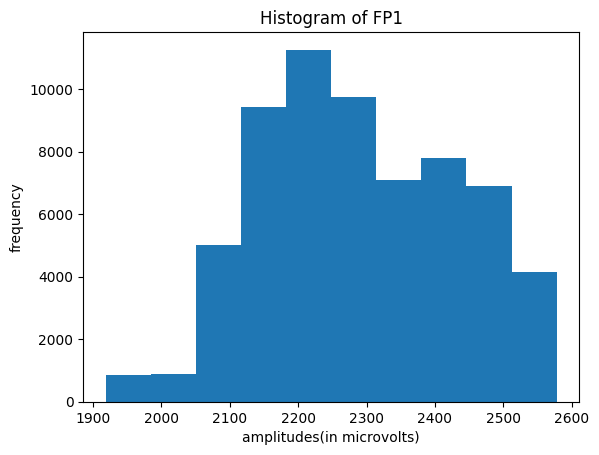

In [ ]:
def plot_hist(data):
    plt.hist(data)
    plt.title(f'Histogram of {data.name}')
    plt.xlabel('amplitudes(in microvolts)')
    plt.ylabel('frequency')

plot_hist(signal_data_set['FP1'])

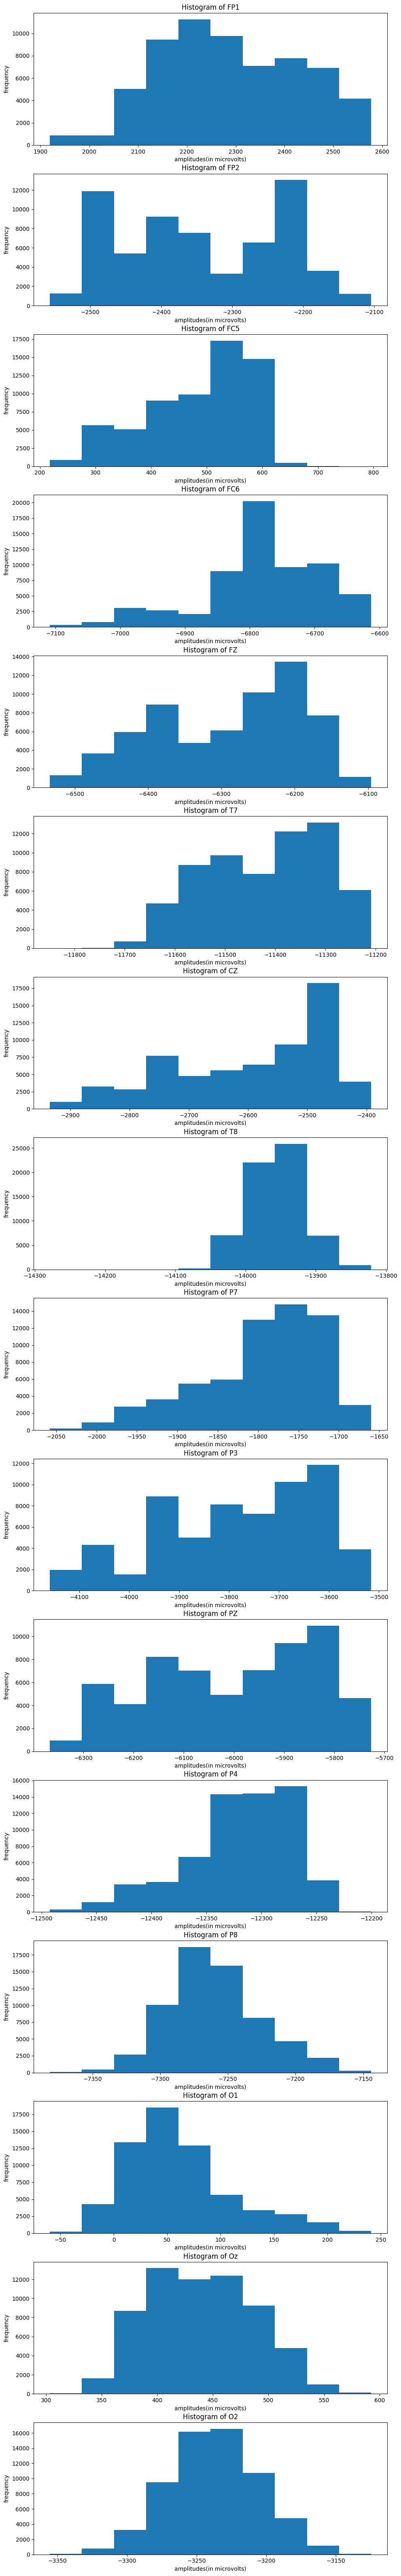

In [ ]:
import matplotlib.pyplot as plt

def plot_hist(data_series, ax):
    ax.hist(data_series)
    ax.set_title(f'Histogram of {data_series.name}')
    ax.set_xlabel('amplitudes(in microvolts)')
    ax.set_ylabel('frequency')

headers = ['FP1', 'FP2', 'FC5', 'FC6', 'FZ', 'T7', 'CZ', 'T8',
           'P7', 'P3', 'PZ', 'P4', 'P8', 'O1', 'Oz', 'O2']

# Creating subplots for each channel
fig, axes = plt.subplots(nrows=len(headers), ncols=1, figsize=(10, 4 * len(headers)))
fig.tight_layout(pad=3.0) # Adjusting layout to prevent overlapping titles/labels

for i, header in enumerate(headers):
    plot_hist(signal_data_set[header], axes[i]) # Passing individual Series
plt.show()